## Artificial Intelligence
## L2 International, Univ. Bordeaux

### Lab #2, Unsupervised Learning (2)

In the previous lab, we discussed a simple clustering algorithm: $k$-means. We have seen that it can be used as a method to create clusters or as a method to compress data.

In this lab we will discuss limitations of this first method and then we will study two additional clustering algorithms: Density-Based Spatial Clustering of Applications with Noise (DBSCAN) and Hierarchical Clustering (HC).

**DBSCAN** (__DBSCAN__ <b>DBSCAN</b>)

*A simple example* 
(_A simple example_
<i>A simple example</i>)
1. Import necessary python modules to use numpy and DBSCAN

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN

2. Create a dataset X, a $6×2$ numpy matrix with the following rows: (1,2), (2,2), (7,6), (8,7), (2,3) and (25,8).

In [2]:
X = np.array([[1, 2], [2, 2], [7, 6], [8, 7], [2, 3], [25, 8]])

3. Plot $X$.

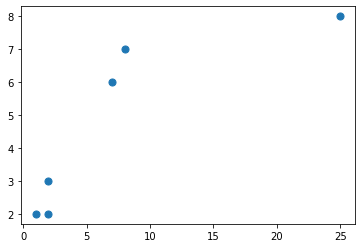

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

4. Instantiate the DBSCAN model. The parameters will be epsilon equal to 3 and the minimum number of points required to form a cluster is 2.

In [4]:
db = DBSCAN(eps=3, min_samples=2)

5. Train the DBSCAN model with X as input data.

In [5]:
db.fit(X)

DBSCAN(eps=3, min_samples=2)

In [ ]:
DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

6. Print the predicted labels for each data point.

In [7]:
print(db.labels_)

[ 0  0  1  1  0 -1]


Let's draw our clusters:

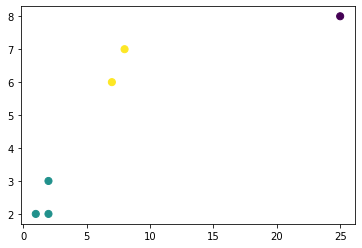

In [8]:
plt.scatter(X[:, 0], X[:,1], c=db.labels_, s=50, cmap='viridis')

Note that [1,2], [2,2] and [2,3] have same label=0. It means they belong to same cluster. While other points with label=1 belong to other cluster. One point: [25, 8] has label=-1. It's a noise point (an outlier). That's why it doesn't belong to any cluster.

**When DBSCAN is necessary**

Execute the following code:

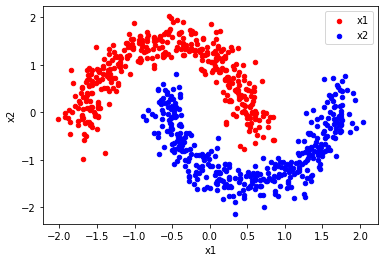

In [11]:
# import libraries
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler

# generate test data using make_moons()
X, y = make_moons(n_samples=750, shuffle=True, noise=0.11, random_state=42)
X = StandardScaler().fit_transform(X)

# just like with the circles, split and organize the data
df = DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
grouped = df.groupby('label')

# and plot it
colors=['red', 'blue']
labels=['x1', 'x2']
fig, ax=pyplot.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=labels[key], color=colors[key])
pyplot.show()

1. Use $k$-means algorithm to create clusters

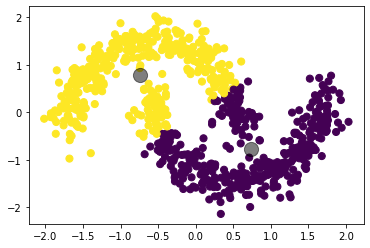

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X)
y_kmeans=km.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers=km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);
plt.show()

2. What do you observe?

$k$-means is not able to create two clusters corresponding to "moons". This is because the two clusters are not convex which is the main assumption of this algorithm.

3. Use DBSCAN to create clusters.

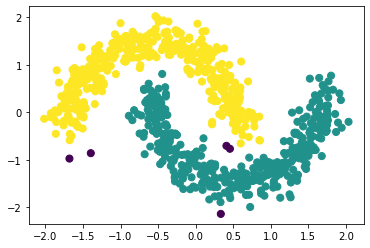

In [14]:
db = DBSCAN(eps=.3, min_samples=10)
db.fit(X)
plt.scatter(X[:,0], X[:,1], c = db.labels_, s=50, cmap='viridis')

We can see that the algorithm creates two clusters and isolates 5 noisy points.